# DOPP Assignment 3

## Schedule

### Week 1, first iteration

- Explore: Amine, Satyam & Malbora

**Due Date**: 18.01.2021, 20:00

### Week 2, next iteration with the other dataset

Adding data and checking if the previous one is really answering our questions

**Meeting**: 18.01.2021, 20:00

- Get: 
- Explore: 
- Model: 
- Visualize:
- 2 pages PDF report: 
- Presentaion: 

**Due date**: 24.01.2021

## Todo

- Get: https://www.kaggle.com/stieranka/predicting-gdp-world-countries

- Do all data process based on the dataset


## Ask

- What percentage of the world population lives in extreme poverty? 

- Which characteristics are predictive for countries with large populations living in extreme poverty? 

- Which characteristics are predictive for populations emerging from extreme poverty?


## Get the Data



- Get: https://www.kaggle.com/stieranka/predicting-gdp-world-countries

## Explore the Data

In this dataset, we are exploring the dataset "Nations of the World" by Fernando Lasso. We will zero in on the components that influencing a nation's GDP for each capita and neediness and attempt to make a model utilizing the information of 227 nations from the dataset. I will likewise momentarily examine the absolute GDPs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Clean the data

In [2]:
dataset = pd.read_csv('https://gist.githubusercontent.com/amboulouma/6cbd30ab138e7414e190025ef39af80d/raw/6bf61690e51176d82d2703fa5c39cd5ed106d15d/countries%2520of%2520the%2520world.csv', decimal=',',dtype={'Country':'string'})

### Missing Data

We saw that there are some missing information in the table. For effortlessness, I will simply fill the missing information utilizing the middle of the area that a nation has a place, as nations that are close topographically are regularly comparative from multiple points of view. For instance, lets check the district middle of 'Gross domestic product ($ per capita)', 'Proficiency (%)' and 'Farming'. Note that for 'atmosphere' we utilize the mode rather than middle as it appears to be that 'atmosphere' is an absolute element here.

In [3]:
  dataset.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()


,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


### Explore the data

Correlation heatmap to understand the relationship between the data

Look at the lowest 50 countries by GDP per capita to check the poverty of those countries






Plotting the correlation of the GDP per capita with the rest of the features

We can notice here for example, high birthrate usually means low GDP per capita, but average GDP in low birthrate countries can vary a lot.

## Model the Data

# Information about Poverty Line Feautures
The poverty gap index can be interpreted as the average percentage shortfall in income for the population, from the poverty line.[5]

If you multiply a country's poverty gap index by both the poverty line and the total number of individuals in the country you get the total amount of money needed to bring the poor in the population out of extreme poverty and up to the poverty line, assuming perfect targeting of transfers. For example, suppose a country has 10 million individuals, a poverty line of $500 per year and a poverty gap index of 5%. Then an average increase of $25 per individual per year would eliminate extreme poverty. Note that $25 is 5% of the poverty line. The total increase needed to eliminate poverty is US$250 million—$25 multiplied by 10 million individuals.

The poverty gap index is an important measure beyond the commonly used head count ratio. Two regions may have the similar head count ratio, but distinctly different poverty gap indices. A higher poverty gap index means that poverty is more severe.

The poverty gap index is additive. In other words, the index can be used as an aggregate poverty measure, as well as decomposed for various sub-groups of the population, such as by region, employment sector, education level, gender, age or ethnic group.

## Visualize The Data

In [4]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

First we import 2 datasets and merge them into one called "data"

In [5]:
df = pd.read_csv('API_SI.POV.DDAY_DS2_en_csv_v2_1928965.csv',dtype={'Country':'string'})
dataset = pd.read_csv('countries of the world.csv',dtype={'Country':'string'})

#dataset = pd.read_csv('countries of the world (2).csv',dtype={'Country':'string','Region':'string','Population':np.int,'Area (sq. mi.)':np.int,'Pop. Density (per sq. mi.)':np.float32,
 #                                                                        'Coastline (coast/area ratio)':np.float32,'Net migration':np.float32,'Infant mortality (per 1000 births)':np.float32,'GDP ($ per capita)':np.float32,
 #                                                                        'Literacy (%)':np.float32,'Phones (per 1000)':np.float32,'Arable (%)':np.float32,'Crops (%)':np.float32,'Other (%)':np.float32,
 #                                                                        'Climate':np.float32,'Birthrate':np.float32,'Deathrate':np.float32,'Agriculture':np.float32,'Industry':np.float32,'Service':np.float32
                                                                 #        })

# dataset = pd.read_csv('https://gist.githubusercontent.com/amboulouma/6cbd30ab138e7414e190025ef39af80d/raw/423c4d9ea180052e4746131064f4d55bc60a87af/countries%2520of%2520the%2520world.csv')
# df = pd.read_csv('https://gist.githubusercontent.com/amboulouma/80a397cf2996aecdefadc46870538c55/raw/897e1f3e707b9658f83d0c994458ab197295b5fb/poverty_headcount_ratio.csv')

dataset = dataset.set_index('Country')
poverty = df[["Country Name","Country Code","Indicator Name","2017"]]
poverty.rename(columns={"Country Name": "Country"}, inplace=True)
poverty = poverty.set_index('Country')
data  = pd.merge(left=dataset, right=poverty, how ='left',left_index=True, right_index=True)

/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Mdeling

Checking for NA values 

In [6]:
info_table = pd.DataFrame(index=data.columns)
info_table ['data_type'] = data.dtypes
info_table ['null_count'] = data.isnull().sum()
info_table

,data_type,null_count
Region,object,0
Population,int64,0
Area (sq. mi.),float64,0
Pop. Density (per sq. mi.),float64,0
Coastline (coast/area ratio),float64,0
Net migration,float64,3
Infant mortality (per 1000 births),float64,3
GDP ($ per capita),float64,1
Literacy (%),float64,18
Phones (per 1000),float64,4


As we can observe there are many missing value 

In [7]:
# Check if categorical variables contain values like "?"
print("\nChecking for ? values")
for value in df.select_dtypes(include='O'):
  print(value,":", sum(df[value] == '?'))

print("\nChecking for NA values")
for value in df.select_dtypes(include='O'):
  print(value,":", sum(df[value] == 'NA'))

print("\nChecking for - values")
for value in df.select_dtypes(include='O'):
  print(value,":", sum(df[value] == '-'))


Checking for ? values
Country Name : 0
Country Code : 0
Indicator Name : 0
Indicator Code : 0

Checking for NA values
Country Name : 0
Country Code : 0
Indicator Name : 0
Indicator Code : 0

Checking for - values
Country Name : 0
Country Code : 0
Indicator Name : 0
Indicator Code : 0


Select only data for 2017 year the year of our original data

In [8]:
df_copy = data.dropna(how='any', subset=['2017'])

In [9]:
info_table = pd.DataFrame(index=df_copy.columns)
info_table ['data_type'] = df_copy.dtypes
info_table ['null_count'] = df_copy.isnull().sum()
info_table

,data_type,null_count
Region,object,0
Population,int64,0
Area (sq. mi.),float64,0
Pop. Density (per sq. mi.),float64,0
Coastline (coast/area ratio),float64,0
Net migration,float64,0
Infant mortality (per 1000 births),float64,0
GDP ($ per capita),float64,0
Literacy (%),float64,0
Phones (per 1000),float64,1


Dealing with NA values

In [10]:
for col in df_copy.columns.values:
    if df_copy[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values =df_copy.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df_copy.groupby('Region')[col].median()
    for region in df_copy['Region'].unique():
        df_copy[col].loc[(df_copy[col].isnull())&(df_copy['Region']==region)] = guess_values[region]

/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-10-606045d137b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col].loc[(df_copy[col].isnull())&(df_copy['Region']==region)] = guess_values[region]


In [11]:
df_copy.describe(include='all')

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country Code,Indicator Name,2017
count,59,5.900000e+01,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,...,59.000000,58.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59,59,59.000000
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,1,NaN
top,WESTERN EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARG,Poverty headcount ratio at $1.90 a day (2011 P...,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59,NaN
mean,NaN,2.200928e+07,6.685804e+05,116.369492,2.808983,-0.096441,22.394915,12967.79661,92.850847,279.281356,...,77.117119,2.724138,15.872966,9.882797,0.093220,0.307627,0.600000,NaN,NaN,3.571186
std,NaN,4.120738e+07,1.728296e+06,184.722701,8.539927,2.782999,24.779355,11425.56783,10.459501,184.896685,...,17.063355,0.663407,8.040665,4.322970,0.079404,0.084819,0.112817,NaN,NaN,8.731119
min,NaN,4.002140e+05,3.160000e+02,3.300000,0.000000,-8.580000,2.770000,600.00000,42.200000,4.000000,...,33.910000,1.000000,8.720000,4.230000,0.010000,0.130000,0.350000,NaN,NaN,0.000000
25%,NaN,3.583780e+06,4.416000e+04,30.300000,0.045000,-0.980000,5.045000,4750.00000,90.800000,131.750000,...,64.290000,2.000000,10.050000,6.950000,0.035000,0.255000,0.550000,NaN,NaN,0.150000
50%,NaN,8.989046e+06,1.109100e+05,79.500000,0.440000,0.000000,13.370000,9100.00000,97.600000,269.500000,...,81.450000,3.000000,11.990000,9.420000,0.070000,0.300000,0.600000,NaN,NaN,0.700000
75%,NaN,1.939751e+07,4.773730e+05,123.950000,1.700000,1.175000,27.820000,19100.00000,99.000000,413.250000,...,92.060000,3.000000,20.410000,11.257500,0.130000,0.345000,0.675000,NaN,NaN,2.800000


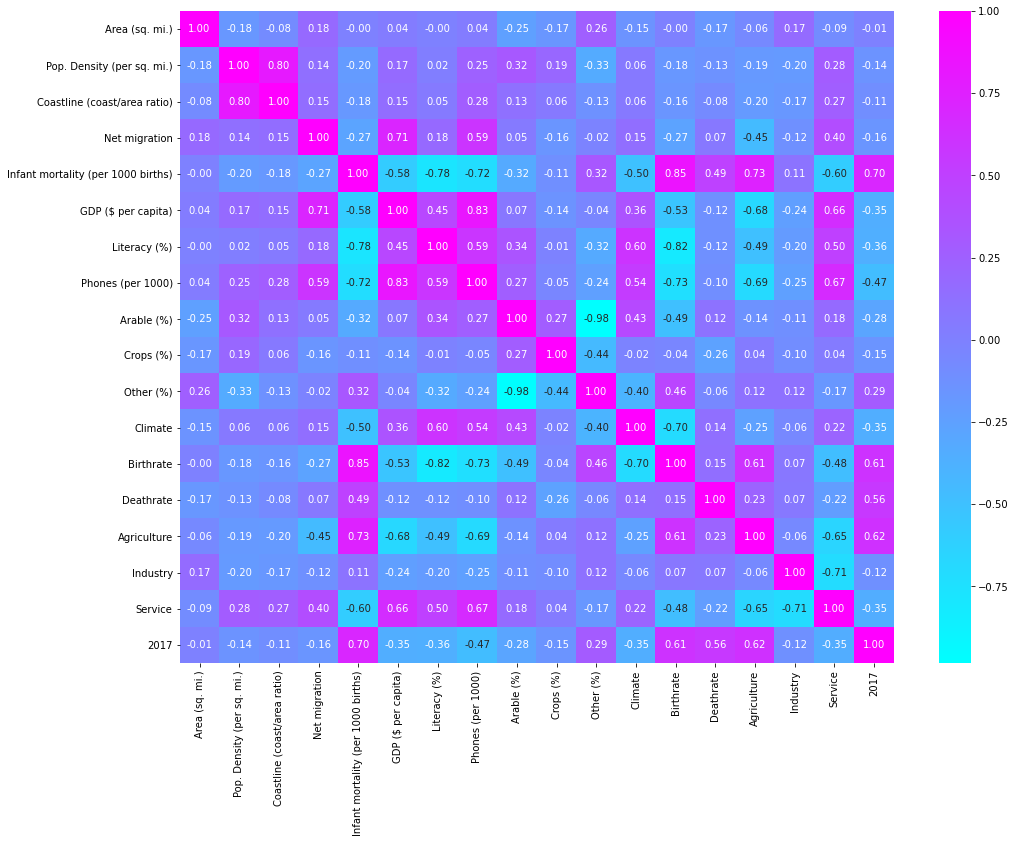

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_copy.iloc[:,2:].corr(),annot=True,fmt='.2f', cmap="cool")
plt.show()

<ipython-input-14-e38f39310a25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Country']=df_copy.index


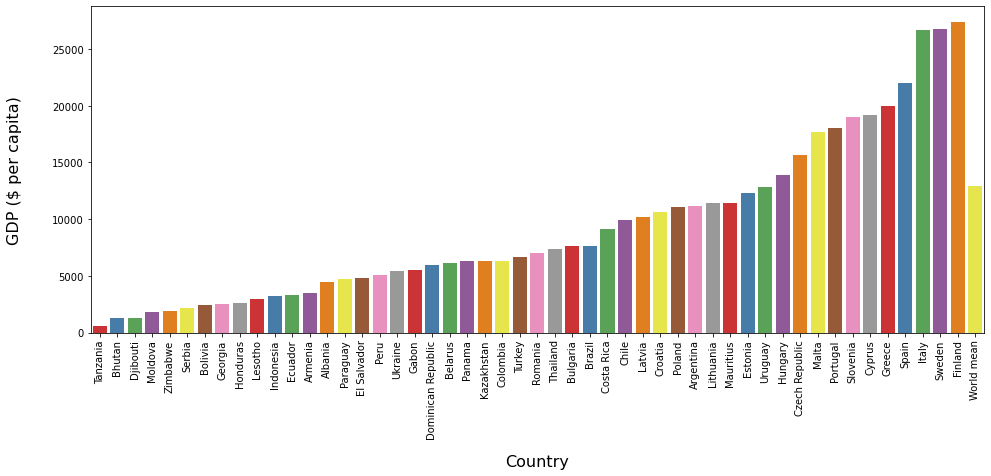

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
df_copy['Country']=df_copy.index
top_lower_gdp_countries = df_copy.sort_values('GDP ($ per capita)',ascending=True).head(50)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[df_copy['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_lower_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### modeling

In [15]:
labelEncoder = preprocessing.LabelEncoder()
columns = df_copy.select_dtypes(include=['object', 'category']).columns
print(columns)

# Drop the values we do not need
df_copy.drop('Indicator Name', 1)
df_copy.drop('Country Code', 1)
df_copy.drop('Area (sq. mi.)',1)
df_copy.drop('Pop. Density (per sq. mi.)',1)
df_copy.drop('Coastline (coast/area ratio)',1)
df_copy.drop('Net migration',1)
		

print("\n New columns", df_copy.select_dtypes(include=['object', 'category']).columns)

Index(['Region', 'Country Code', 'Indicator Name', 'Country'], dtype='object')

 New columns Index(['Region', 'Country Code', 'Indicator Name', 'Country'], dtype='object')


In [16]:
df_copy.head(2)
		

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country Code,Indicator Name,2017,Country
Country,,,,,,,,,,,,,,,,,,,,,
Albania,EASTERN EUROPE,3581655,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,3.0,15.11,5.22,0.23,0.19,0.58,ALB,Poverty headcount ratio at $1.90 a day (2011 P...,1.3,Albania
Argentina,LATIN AMER. & CARIB,39921833,2766890.0,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,...,3.0,16.73,7.55,0.10,0.36,0.55,ARG,Poverty headcount ratio at $1.90 a day (2011 P...,0.8,Argentina


In [17]:
# Create categorical columns
labelEncoder = preprocessing.LabelEncoder()
region_cat = labelEncoder.fit_transform(df_copy['Region'])
# Initialize columns
df_copy['region_cat'] = region_cat
# Dropping the old values
old = df_copy.select_dtypes(include=['object', 'category']).columns
df_copy = df_copy.drop(old, axis=1)
df_copy.head()

<ipython-input-17-27290fc7829c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['region_cat'] = region_cat


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,2017,region_cat
Country,,,,,,,,,,,,,,,,,,,,
Albania,3581655,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.23,0.19,0.58,1.3,3
Argentina,39921833,2766890.0,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.10,0.36,0.55,0.8,4
Armenia,2976372,29800.0,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.24,0.34,0.42,0.9,2
Austria,8192880,83870.0,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.02,0.30,0.68,0.3,8
Belarus,10293011,207600.0,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.09,0.32,0.59,0.0,2


KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
ftr = df_copy.drop('2017', 1)
label = df_copy['2017']
x_train,x_test,y_train,y_test = train_test_split(ftr,label,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', round( knn.score(x_test,y_test) * 100, 2))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


def runModel(train_features, train_labels, test_features, test_labels, trees, depth):
  print("Trees: ", trees)
  # Set up and run the model
  rf = RandomForestRegressor(n_estimators = trees, max_depth=depth)
  rf.fit(train_features, train_labels);

  predictions = rf.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    

  accuracy = evaluate(rf, test_features, test_labels)
  return accuracy

In [28]:
import scorecardpy as sc
		
Z = df_copy.drop(['2017','Area (sq. mi.)','Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Crops (%)','Industry','Service',
                  'redion_cat','Arable (%)',	'Other (%)', 'Phones (per 1000)','Agriculture', 'Deathrate','Climate','Population','Infant mortality (per 1000 births)'
                  
                  
                  ], 1)
#Z= df_copy['Agriculture',]
lbl = df_copy['2017']
train_features, test_features, train_labels, test_labels = train_test_split(Z,lbl,test_size = 0.25, random_state = 42)
base_accuracy = runModel(train_features, train_labels, test_features, test_labels, 20, None)
print("Base accuracy:", base_accuracy)

KeyError: "['redion_cat'] not found in axis"

In [29]:
accuracies2 = []
depth = [1, 2, 3, 50, 100, 200, 250, 300, 400, 500]
for i in treeCount:
  accuracies2.append(runModel(train_features, train_labels, test_features, test_labels, i,None))

plt.figure(figsize=(13,8))
index = np.arange(len(accuracies2))
plt.bar(index, accuracies2)
plt.xlabel('Depth', fontsize=8)
plt.ylabel('Accuracies', fontsize=8)
plt.xticks(index, depth, fontsize=8, rotation=30)
plt.title('Overview of depth change')
plt.show()

NameError: name 'treeCount' is not defined

In [30]:
Z.head(1)

NameError: name 'Z' is not defined

In [31]:
# Let's calculate accuracies in range of 1 - 10 trees

accuracies = []
treeCount = [1, 2, 3, 5, 10, 20, 25, 30, 40, 50,60,70,80,90,100,1000]
for i in treeCount:
  accuracies.append(runModel(train_features, train_labels, test_features, test_labels, i, None))

plt.figure(figsize=(13,8))
index = np.arange(len(accuracies))
plt.bar(index, accuracies)
plt.xlabel('Trees in Forest', fontsize=8)
plt.ylabel('Accuracies', fontsize=8)
plt.xticks(index, treeCount, fontsize=8, rotation=30)
plt.title('Overview of tree size change')
plt.show()

NameError: name 'train_features' is not defined

In [32]:
importances = list(rf.feature_importances_)
print(rf.feature_importances_)

NameError: name 'rf' is not defined

In [33]:
# Pull out one tree from the forest  
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
tree = rf.estimators_[5]

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Saving feature names for later use
feature_list = list(Z.columns)
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

NameError: name 'train_features' is not defined

## Modeling